# Group Project: Minimal Working Expamle ....,,,,

Below script is a minimum working example using the group project data to derive a ML-model. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('seaborn-whitegrid')
plt.rcParams['font.size'] = 10

In [2]:
# Load data
df = pd.read_csv("GroupProjectDataSet.csv", sep=',')
print('Shape of data frame:', df.shape)
df.head()

Shape of data frame: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Class
0,530.0,20.0,RL,NaN,32668.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,3.0,2007.0,WD,Alloca,2.0
1,492.0,50.0,RL,79.0,9490.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,MnPrv,NaN,0.0,8.0,2006.0,WD,Normal,1.0
2,460.0,50.0,RL,NaN,7015.0,Pave,NaN,IR1,Bnk,AllPub,...,0.0,NaN,NaN,NaN,0.0,7.0,2009.0,WD,Normal,1.0
3,280.0,60.0,RL,83.0,10005.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,3.0,2008.0,WD,Normal,1.0
4,656.0,160.0,RM,21.0,1680.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,3.0,2010.0,WD,Family,0.0


In [3]:
# Assess missing values
cols = df.columns[df.isna().any()]
df_nan = df[cols].copy()
df_nan['Class'] = df['Class']
print('Percentage of missing values per column:')
df_nan.isna().sum() / df_nan.shape[0]

Percentage of missing values per column:


LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
Class           0.000000
dtype: float64

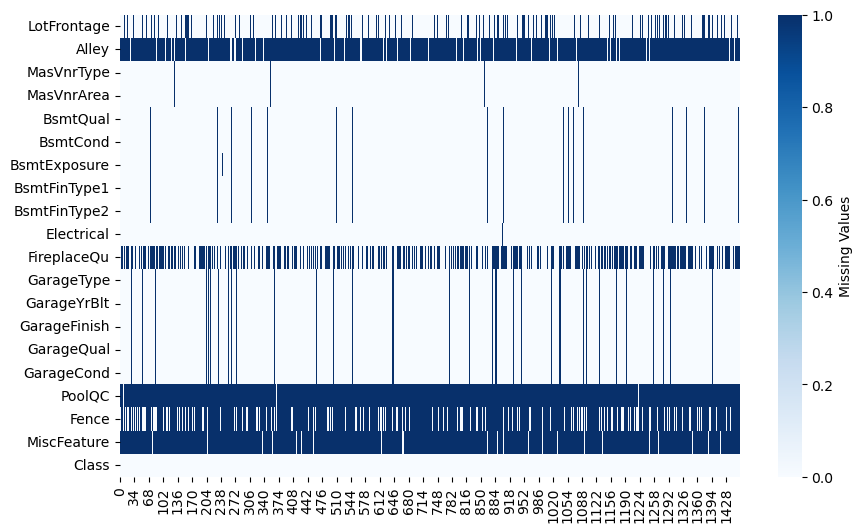

In [4]:
# Plot missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df_nan.isna().transpose(),
            cmap="Blues",
            cbar_kws={'label': 'Missing Values'});

Assess Class imbalance. You make your own assessment on potential effects of class-imbalance. 

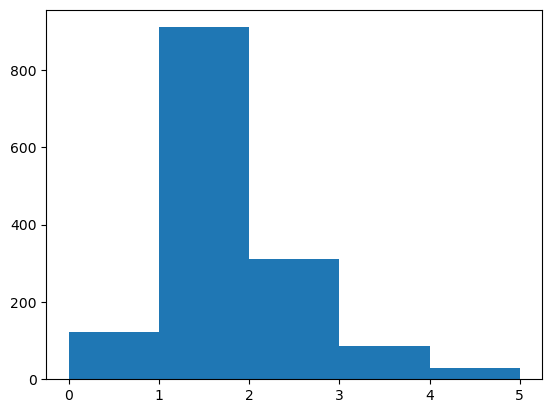

In [5]:
plt.hist(df['Class'], bins=[0, 1, 2, 3, 4, 5]);

Note: I will now drop all columns where NaN-values make up more than 40%. However, this is not a wise step. Read the data description to better understand why. But to not disclose too much of an optimal solution, this is done on purpose!

In [6]:
df = df.dropna(thresh=df.shape[0]*0.4, axis=1) # how='all' ???
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Class
0,530.0,20.0,RL,NaN,32668.0,Pave,IR1,Lvl,AllPub,CulDSac,...,200.0,0.0,0.0,0.0,0.0,3.0,2007.0,WD,Alloca,2.0
1,492.0,50.0,RL,79.0,9490.0,Pave,Reg,Lvl,AllPub,Inside,...,32.0,0.0,0.0,0.0,0.0,8.0,2006.0,WD,Normal,1.0
2,460.0,50.0,RL,NaN,7015.0,Pave,IR1,Bnk,AllPub,Corner,...,248.0,0.0,0.0,0.0,0.0,7.0,2009.0,WD,Normal,1.0
3,280.0,60.0,RL,83.0,10005.0,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,3.0,2008.0,WD,Normal,1.0
4,656.0,160.0,RM,21.0,1680.0,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,WD,Family,0.0


In [7]:
# Asign columns to feature matrix X and response vector y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   float64
 17  OverallCond    1460 non-null   float64
 18  YearBuil

In [9]:
# Imports
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.compose import make_column_selector as selector

In [10]:
# Train, test set split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    stratify=y)

In [11]:
# Mute warnings (related to LogReg 'max_iter' param)
import warnings
warnings.filterwarnings('ignore')


num_transformer = Pipeline(
    steps=[("scaler", StandardScaler()), ("imputer", SimpleImputer(strategy="median"))]
)

cat_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ("selector", SelectPercentile(chi2, percentile=50)),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, selector(dtype_include=np.number)),
        ("cat", cat_transformer, selector(dtype_include=object)),
    ]
)
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)


clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))
clf

model score: 0.798


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe28b892920>),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('selector',
                                                                   SelectPercentile(percentile=50,
                                                                                    score_func=<function chi2 at 0x7fe28b894ca0>))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe28b892950>)])),
                ('classifier', LogisticRegression())])

In [12]:
param_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "preprocessor__cat__selector__percentile": [10, 30, 50, 70],
    "classifier__C": [0.1, 1.0, 10, 100],
}

search_cv = RandomizedSearchCV(clf, param_grid, n_iter=10, random_state=0)
search_cv

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler()),
                                                                                               ('imputer',
                                                                                                SimpleImputer(strategy='median'))]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7fe28b892920>),
                                                                              ('cat',
                                                                               Pipeline(steps=[('encoder',
                                                                                                OneHotEncoder(handle_unknown='ignore')),
                                                                                               ('s...
                                                                                                                 score_func=<function chi2 at 0x7fe28b894ca0>))]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x7fe28b892950>)])),
                                             ('classifier',
                                              LogisticRegression())]),
                   param_distributions={'classifier__C': [0.1, 1.0, 10, 100],
                                        'preprocessor__cat__selector__percentile': [10,
                                                                                    30,
                                                                                    50,
                                                                                    70],
                                        'preprocessor__num__imputer__strategy': ['mean',
                                                                                 'median']},
                   random_state=0)

In [13]:
search_cv.fit(X_train, y_train)

# Print results
print('Best CV accuracy: {:.2f}'.format(search_cv.best_score_))
print('Test score:       {:.2f}'.format(search_cv.score(X_test, y_test)))
print('Best parameters: {}'.format(search_cv.best_params_))


Best CV accuracy: 0.83
Test score:       0.79
Best parameters: {'preprocessor__num__imputer__strategy': 'median', 'preprocessor__cat__selector__percentile': 30, 'classifier__C': 1.0}


Now let's see similarly for RandomForest

In [14]:
from sklearn.ensemble import RandomForestClassifier


clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", RandomForestClassifier())]
)


clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))
clf

model score: 0.812


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe28b892920>),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('selector',
                                                                   SelectPercentile(percentile=50,
                                                                                    score_func=<function chi2 at 0x7fe28b894ca0>))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe28b892950>)])),
                ('classifier', RandomForestClassifier())])

In [15]:
param_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "preprocessor__cat__selector__percentile": [10, 30, 50, 70],
    "classifier__max_depth": [1, 3, 5, 10],
}

search_cv = RandomizedSearchCV(clf, param_grid, n_iter=10, random_state=0)

search_cv.fit(X_train, y_train)

# Print results
print('Best CV accuracy: {:.2f}'.format(search_cv.best_score_))
print('Test score:       {:.2f}'.format(search_cv.score(X_test, y_test)))
print('Best parameters: {}'.format(search_cv.best_params_))


Best CV accuracy: 0.83
Test score:       0.81
Best parameters: {'preprocessor__num__imputer__strategy': 'mean', 'preprocessor__cat__selector__percentile': 30, 'classifier__max_depth': 10}


In [16]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

cat_selector = selector(dtype_include=object)
num_selector = selector(dtype_include=np.number)

cat_tree_processor = OrdinalEncoder(
    handle_unknown="use_encoded_value",
    unknown_value=-1,
    encoded_missing_value=-2,
)
num_tree_processor = SimpleImputer(strategy="mean", add_indicator=True)

tree_preprocessor = make_column_transformer(
    (num_tree_processor, num_selector), (cat_tree_processor, cat_selector)
)

#####

clf = Pipeline(
    steps=[("preprocessor", tree_preprocessor), ("classifier", RandomForestClassifier())]
)


clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))
clf

model score: 0.818


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('simpleimputer',
                                                  SimpleImputer(add_indicator=True),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe28b00f580>),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(encoded_missing_value=-2,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe289cda2c0>)])),
                ('classifier', RandomForestClassifier())])

In [17]:
param_grid = {
    "classifier__max_depth": [5, 10, 25],
}

search_cv = RandomizedSearchCV(clf, param_grid, n_iter=10, random_state=0)

search_cv.fit(X_train, y_train)

# Print results
print('Best CV accuracy: {:.2f}'.format(search_cv.best_score_))
print('Test score:       {:.2f}'.format(search_cv.score(X_test, y_test)))
print('Best parameters: {}'.format(search_cv.best_params_))


Best CV accuracy: 0.84
Test score:       0.82
Best parameters: {'classifier__max_depth': 25}


In [ ]:
#SUPPORT VECTOR MACHINES 

In [29]:
from sklearn import svm
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


scaler = StandardScaler()
ros = RandomOverSampler(random_state = 42)
mms = MinMaxScaler()
kFold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

svm = svm.SVC(random_state = 42, max_iter = 1000, shrinking = True)
print(f"Parameters of the Support Vector Machine: {svm.get_params().keys()}")

svm_pipe = imbpipeline(steps=[["scaler", scaler], ["ros", ros], ["SVM", svm]])
param_grid = {
    'ros': [ros, None], 
    'scaler': [scaler, mms],
    "SVM__kernel": ["linear", "sigmoid"],
    "SVM__C": [1, 10],
    "SVM__gamma": ["auto", "scale"]
}
gs = GridSearchCV(estimator = svm_pipe, param_grid = param_grid, scoring = "f1_weighted",
                  cv = kFold, n_jobs = -1)
gs = gs.fit(X_train, y_train)

get_results_cv(gs, X_test, y_test)
y_pred = gs.best_estimator_.predict(X_test)
# get test score, metrics report and confusion matrix
final_report(y_test, y_pred)



Parameters of the Support Vector Machine: dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])


ValueError: 
All the 160 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/selinawaber/opt/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/selinawaber/opt/anaconda3/lib/python3.10/site-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/Users/selinawaber/opt/anaconda3/lib/python3.10/site-packages/imblearn/pipeline.py", line 240, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/selinawaber/opt/anaconda3/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/Users/selinawaber/opt/anaconda3/lib/python3.10/site-packages/sklearn/pipeline.py", line 893, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/Users/selinawaber/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/Users/selinawaber/opt/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 862, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/Users/selinawaber/opt/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py", line 824, in fit
    return self.partial_fit(X, y, sample_weight)
  File "/Users/selinawaber/opt/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py", line 861, in partial_fit
    X = self._validate_data(
  File "/Users/selinawaber/opt/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 546, in _validate_data
    X = check_array(X, input_name="X", **check_params)
  File "/Users/selinawaber/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/Users/selinawaber/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/Users/selinawaber/opt/anaconda3/lib/python3.10/site-packages/pandas/core/generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'RL'

--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/selinawaber/opt/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/selinawaber/opt/anaconda3/lib/python3.10/site-packages/imblearn/pipeline.py", line 293, in fit
    Xt, yt = self._fit(X, y, **fit_params_steps)
  File "/Users/selinawaber/opt/anaconda3/lib/python3.10/site-packages/imblearn/pipeline.py", line 240, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/Users/selinawaber/opt/anaconda3/lib/python3.10/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/Users/selinawaber/opt/anaconda3/lib/python3.10/site-packages/sklearn/pipeline.py", line 893, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/Users/selinawaber/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/Users/selinawaber/opt/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 862, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/Users/selinawaber/opt/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py", line 427, in fit
    return self.partial_fit(X, y)
  File "/Users/selinawaber/opt/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py", line 466, in partial_fit
    X = self._validate_data(
  File "/Users/selinawaber/opt/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 546, in _validate_data
    X = check_array(X, input_name="X", **check_params)
  File "/Users/selinawaber/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/Users/selinawaber/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/Users/selinawaber/opt/anaconda3/lib/python3.10/site-packages/pandas/core/generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'RL'
